In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [3]:
df = pd.read_csv('Budget Forecsating.csv')
df

Expenditure Type  \
0   Ministry of Civil Aviation - Central Sector Sc...   
1   Ministry of Civil Aviation - Establishment Exp...   
2   Ministry of Civil Aviation - Other Central Sec...   
3   Ministry of Coal - Central Sector Schemes/Proj...   
4   Ministry of Coal - Establishment Expenditure o...   
5   Ministry of Coal - Other Central Sector Expend...   
6   Department of Commerce - Central Sector Scheme...   
7   Department of Commerce - Establishment Expendi...   
8   Department of Commerce - Other Central Sector ...   
9   Promotion of Industry and Internal Trade - Cen...   
10  Promotion of Industry and Internal Trade - Est...   
11  Promotion of Industry and Internal Trade - Oth...   

    2022-2023 Actuals (Revenue)  2022-2023 Actuals (Capital)  \
0                       8333.12                         0.00   
1                        464.98                        86.44   
2                        436.31                         0.00   
3                         55.58                         0.00   
4                         47.31                         0.00   
5                          0.57                         0.00   
6                       5914.87                       388.00   
7                        734.39                         7.00   
8                          9.67                         0.00   
9                       3690.38                      1565.00   
10                       498.43                        33.28   
11                       159.78                         0.00   

    Total 2022-2023 Actuals  Budget Estimates 2023-2024 (Revenue)  \
0                   8333.12                               1277.09   
1                    551.42                                555.10   
2                    436.31                               1194.51   
3                     55.58                                113.50   
4                     47.31                                 66.63   
5                      0.57                                 10.64   
6                   6302.87                               4351.46   
7                    741.39                                801.47   
8                      9.67                                 63.50   
9                   5255.38                               5741.88   
10                   531.71                                626.80   
11                   159.78                                180.25   

    Budget Estimates 2023-2024 (Capital)  Total Budget Estimates 2023-2024  \
0                                   0.00                           1277.09   
1                                  86.66                            641.76   
2                                   0.00                           1194.51   
3                                   0.00                            113.50   
4                                   1.55                             68.18   
5                                   0.00                             10.64   
6                                   0.01                           4351.47   
7                                  38.14                            839.61   
8                                   0.00                             63.50   
9                                1630.15                           7372.03   
10                                 21.55                            648.35   
11                                  0.00                            180.25   

    Revised Estimates 2023-2024 (Revenue)  \
0                                  883.01   
1                                  469.53   
2                                  797.81   
3                                  110.50   
4                                   66.33   
5                                   10.66   
6                                 5244.39   
7                                  739.35   
8                                   37.57   
9                                 3966.55   
10                                 595.39   
11       

In [4]:
df.head()

Expenditure Type  \
0  Ministry of Civil Aviation - Central Sector Sc...   
1  Ministry of Civil Aviation - Establishment Exp...   
2  Ministry of Civil Aviation - Other Central Sec...   
3  Ministry of Coal - Central Sector Schemes/Proj...   
4  Ministry of Coal - Establishment Expenditure o...   

   2022-2023 Actuals (Revenue)  2022-2023 Actuals (Capital)  \
0                      8333.12                         0.00   
1                       464.98                        86.44   
2                       436.31                         0.00   
3                        55.58                         0.00   
4                        47.31                         0.00   

   Total 2022-2023 Actuals  Budget Estimates 2023-2024 (Revenue)  \
0                  8333.12                               1277.09   
1                   551.42                                555.10   
2                   436.31                               1194.51   
3                    55.58                                113.50   
4                    47.31                                 66.63   

   Budget Estimates 2023-2024 (Capital)  Total Budget Estimates 2023-2024  \
0                                  0.00                           1277.09   
1                                 86.66                            641.76   
2                                  0.00                           1194.51   
3                                  0.00                            113.50   
4                                  1.55                             68.18   

   Revised Estimates 2023-2024 (Revenue)  \
0                                 883.01   
1                                 469.53   
2                                 797.81   
3                                 110.50   
4                                  66.33   

   Revised Estimates 2023-2024 (Capital)  Total Revised Estimates 2023-2024  \
0                                   0.00                             883.01   
1                                 171.77                             641.30   
2                                 600.00                            1397.81   
3                                   0.00                             110.50   
4                                   1.55                              67.88   

   Budget Estimates 2024-2025 (Revenue)  Budget Estimates 2024-2025 (Capital)  \
0                                559.01                                  0.00   
1                                512.52                                 41.95   
2                               1186.26                                  0.00   
3                                113.50                                  0.00   
4                                 66.74                                  2.20   

   Total Budget Estimates 2024-2025  
0                            559.01  
1                            554.47  
2                           1186.52  
3                            113.50  
4                             68.94

In [5]:
df.shape

(12, 13)

In [6]:
df.dtypes

Expenditure Type                          object
2022-2023 Actuals (Revenue)              float64
2022-2023 Actuals (Capital)              float64
Total 2022-2023 Actuals                  float64
Budget Estimates 2023-2024 (Revenue)     float64
Budget Estimates 2023-2024 (Capital)     float64
Total Budget Estimates 2023-2024         float64
Revised Estimates 2023-2024 (Revenue)    float64
Revised Estimates 2023-2024 (Capital)    float64
Total Revised Estimates 2023-2024        float64
Budget Estimates 2024-2025 (Revenue)     float64
Budget Estimates 2024-2025 (Capital)     float64
Total Budget Estimates 2024-2025         float64
dtype: object

In [7]:
df.count()

Expenditure Type                         12
2022-2023 Actuals (Revenue)              12
2022-2023 Actuals (Capital)              12
Total 2022-2023 Actuals                  12
Budget Estimates 2023-2024 (Revenue)     12
Budget Estimates 2023-2024 (Capital)     12
Total Budget Estimates 2023-2024         12
Revised Estimates 2023-2024 (Revenue)    12
Revised Estimates 2023-2024 (Capital)    12
Total Revised Estimates 2023-2024        12
Budget Estimates 2024-2025 (Revenue)     12
Budget Estimates 2024-2025 (Capital)     12
Total Budget Estimates 2024-2025         12
dtype: int64

In [8]:
df.isnull().sum()

Expenditure Type                         0
2022-2023 Actuals (Revenue)              0
2022-2023 Actuals (Capital)              0
Total 2022-2023 Actuals                  0
Budget Estimates 2023-2024 (Revenue)     0
Budget Estimates 2023-2024 (Capital)     0
Total Budget Estimates 2023-2024         0
Revised Estimates 2023-2024 (Revenue)    0
Revised Estimates 2023-2024 (Capital)    0
Total Revised Estimates 2023-2024        0
Budget Estimates 2024-2025 (Revenue)     0
Budget Estimates 2024-2025 (Capital)     0
Total Budget Estimates 2024-2025         0
dtype: int64

In [9]:
df['2022-2023 Actuals (Revenue)'].head()

0    8333.12
1     464.98
2     436.31
3      55.58
4      47.31
Name: 2022-2023 Actuals (Revenue), dtype: float64

# Data Visualization

array([[<Axes: title={'center': '2022-2023 Actuals (Revenue)'}>,
        <Axes: title={'center': '2022-2023 Actuals (Capital)'}>,
        <Axes: title={'center': 'Total 2022-2023 Actuals'}>],
       [<Axes: title={'center': 'Budget Estimates 2023-2024 (Revenue)'}>,
        <Axes: title={'center': 'Budget Estimates 2023-2024 (Capital)'}>,
        <Axes: title={'center': 'Total Budget Estimates 2023-2024'}>],
       [<Axes: title={'center': 'Revised Estimates 2023-2024 (Revenue)'}>,
        <Axes: title={'center': 'Revised Estimates 2023-2024 (Capital)'}>,
        <Axes: title={'center': 'Total Revised Estimates 2023-2024'}>],
       [<Axes: title={'center': 'Budget Estimates 2024-2025 (Revenue)'}>,
        <Axes: title={'center': 'Budget Estimates 2024-2025 (Capital)'}>,
        <Axes: title={'center': 'Total Budget Estimates 2024-2025'}>]],
      dtype=object)

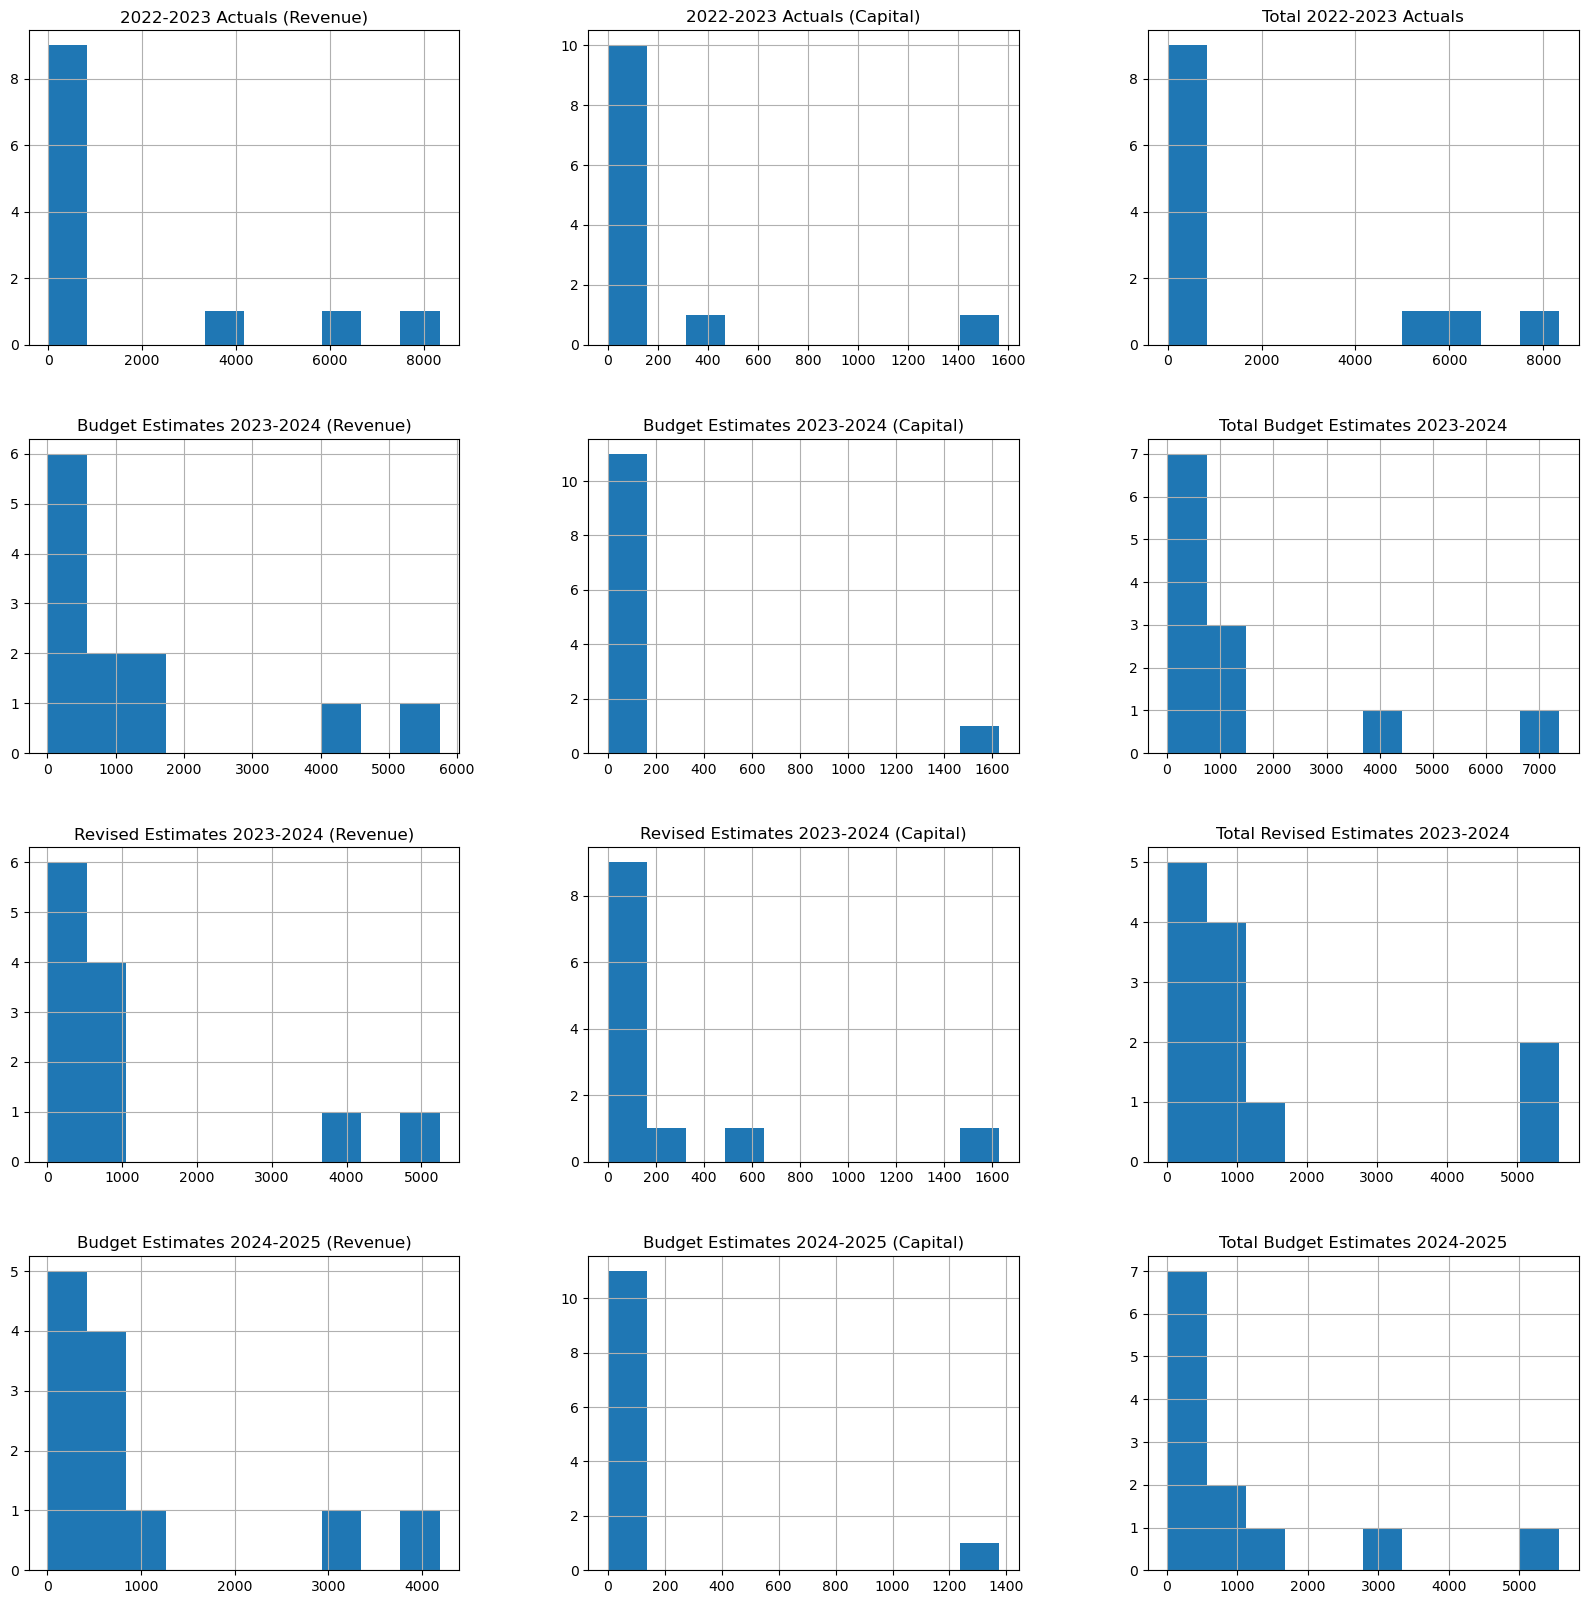

In [10]:
df.hist(figsize = (20,20))

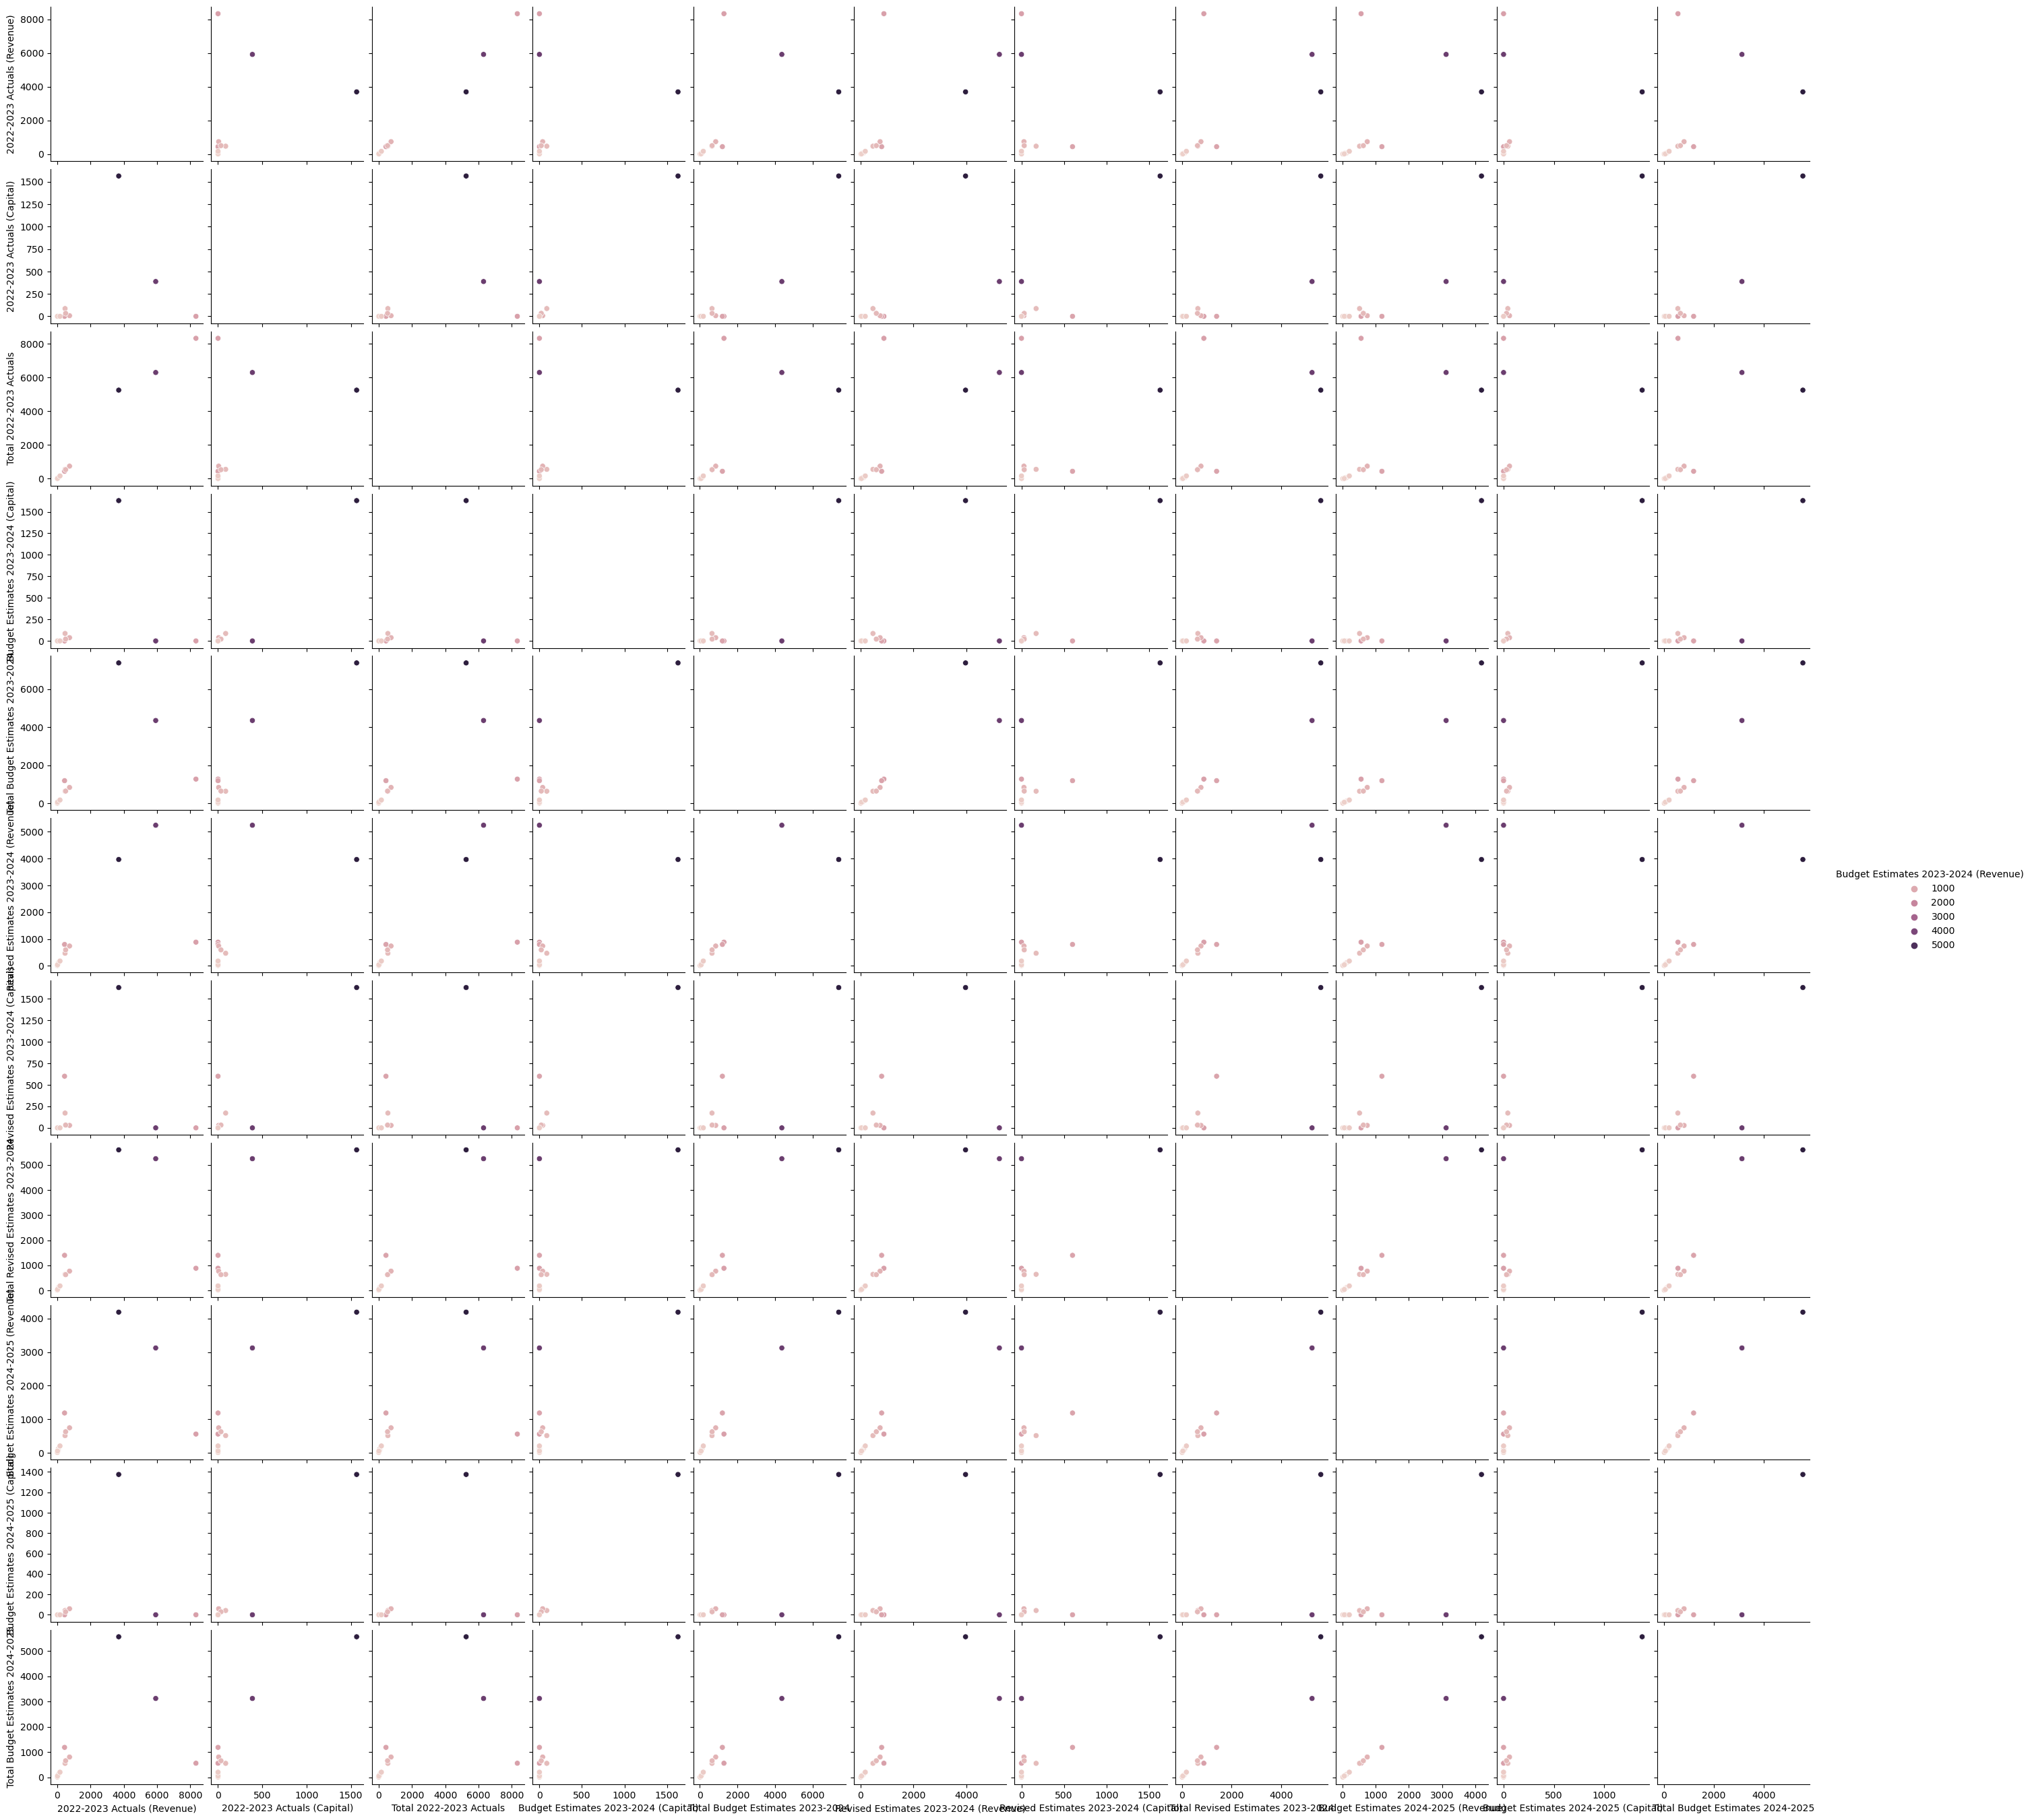

In [11]:
sn.pairplot(df, hue = 'Budget Estimates 2023-2024 (Revenue)')

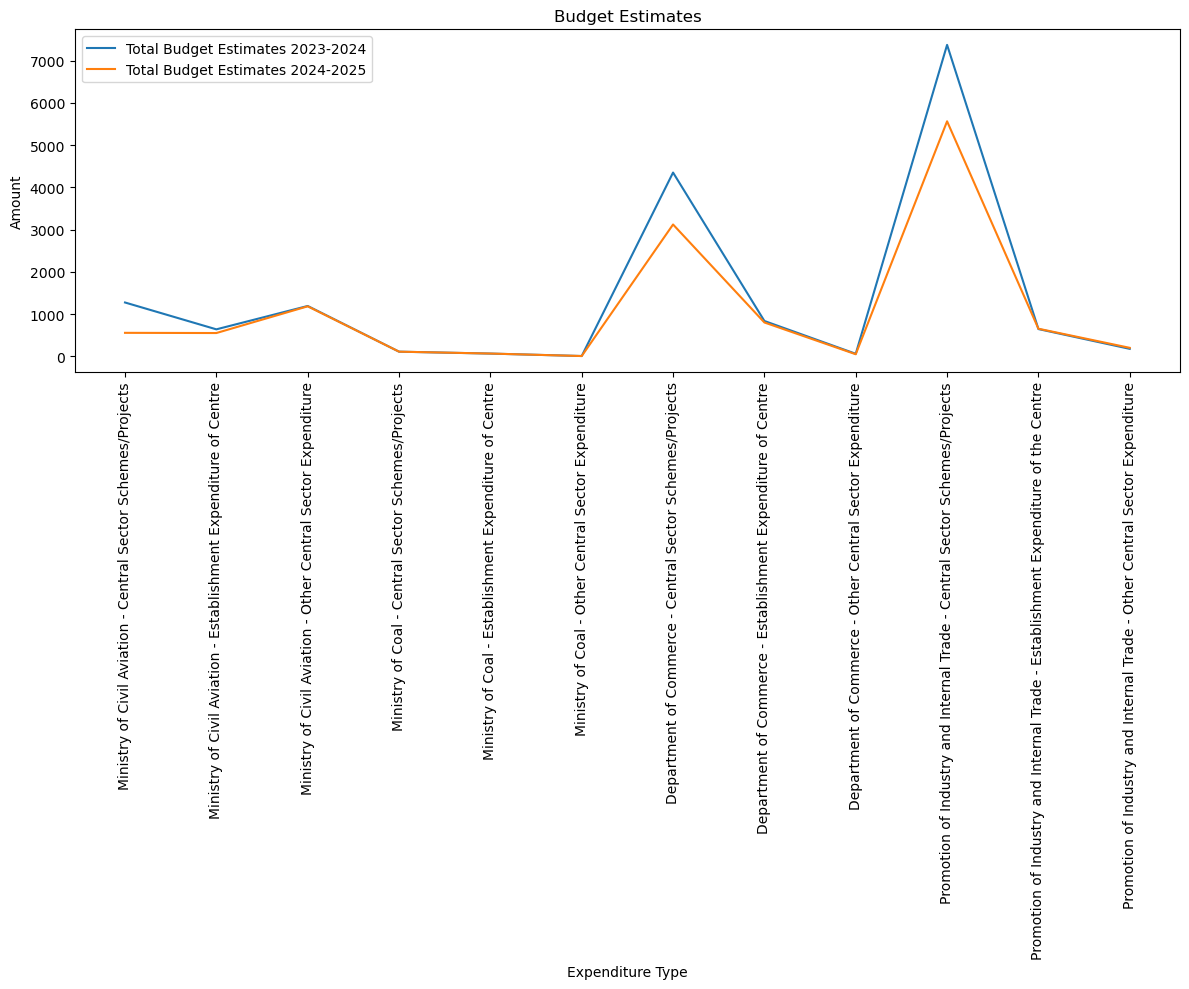

In [12]:
#Compare the Budget Estimatesfor each ministry/department in 2022-2023.

plt.figure(figsize=(12, 10))
plt.plot(df["Expenditure Type"], df["Total Budget Estimates 2023-2024"], label="Total Budget Estimates 2023-2024")
plt.plot(df["Expenditure Type"], df["Total Budget Estimates 2024-2025"], label="Total Budget Estimates 2024-2025")
plt.xlabel("Expenditure Type")
plt.ylabel("Amount")
plt.title("Budget Estimates")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

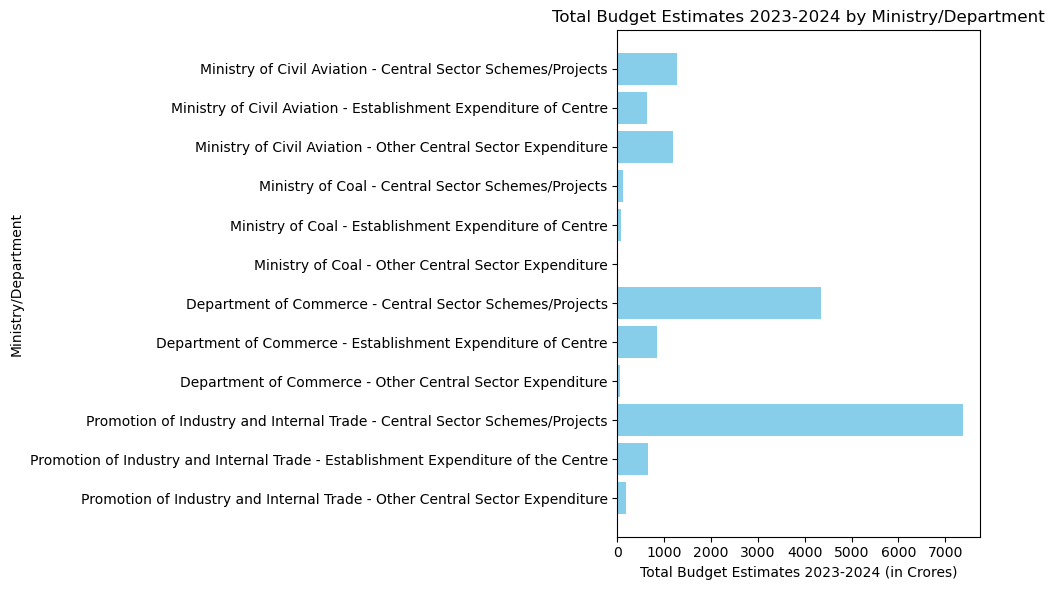

In [13]:
plt.figure(figsize=(10, 6))
plt.barh(df["Expenditure Type"], df["Total Budget Estimates 2023-2024"], color='skyblue')
plt.xlabel('Total Budget Estimates 2023-2024 (in Crores)')
plt.ylabel('Ministry/Department')
plt.title('Total Budget Estimates 2023-2024 by Ministry/Department')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

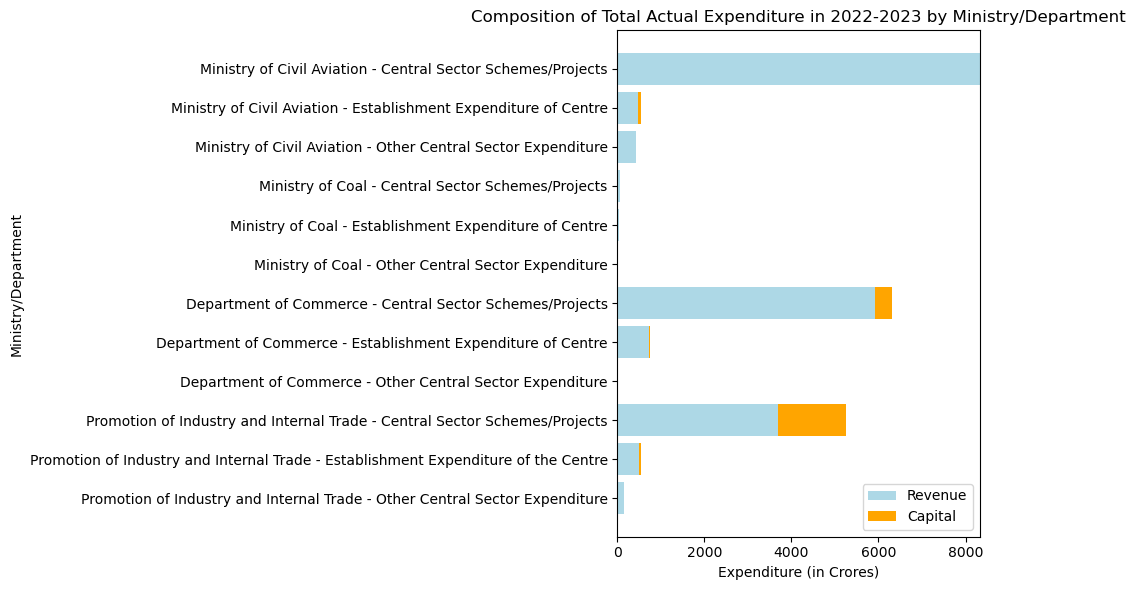

In [132]:
plt.figure(figsize=(10, 6))
plt.barh(df["Expenditure Type"], df["2022-2023 Actuals (Revenue)"], color='lightblue', label='Revenue')
plt.barh(df["Expenditure Type"], df["2022-2023 Actuals (Capital)"], left=df["2022-2023 Actuals (Revenue)"], color='orange', label='Capital')
plt.xlabel('Expenditure (in Crores)')
plt.ylabel('Ministry/Department')
plt.title('Composition of Total Actual Expenditure in 2022-2023 by Ministry/Department')
plt.legend()
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

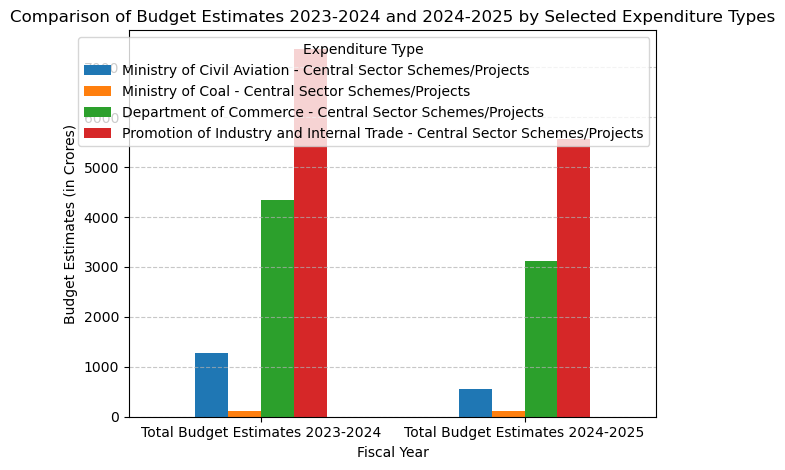

In [14]:
# Select the relevant columns for visualization
budget_data = df[["Expenditure Type", "Total Budget Estimates 2023-2024", "Total Budget Estimates 2024-2025"]]

# Filter the DataFrame to include only the desired expenditure types
expenditure_types_to_compare = ["Ministry of Civil Aviation - Central Sector Schemes/Projects",
                                "Department of Commerce - Central Sector Schemes/Projects","Ministry of Coal - Central Sector Schemes/Projects",
                                "Promotion of Industry and Internal Trade - Central Sector Schemes/Projects"]

budget_data = budget_data[budget_data["Expenditure Type"].isin(expenditure_types_to_compare)]

# Set the Expenditure Type column as the index for better visualization
budget_data.set_index("Expenditure Type", inplace=True)

# Transpose the DataFrame for easier plotting
budget_data = budget_data.T

# Plotting the data
plt.figure(figsize=(10, 6))
budget_data.plot(kind='bar', stacked=False)
plt.xlabel('Fiscal Year')
plt.ylabel('Budget Estimates (in Crores)')
plt.title('Comparison of Budget Estimates 2023-2024 and 2024-2025 by Selected Expenditure Types')
plt.xticks(rotation=0)
plt.legend(title='Expenditure Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

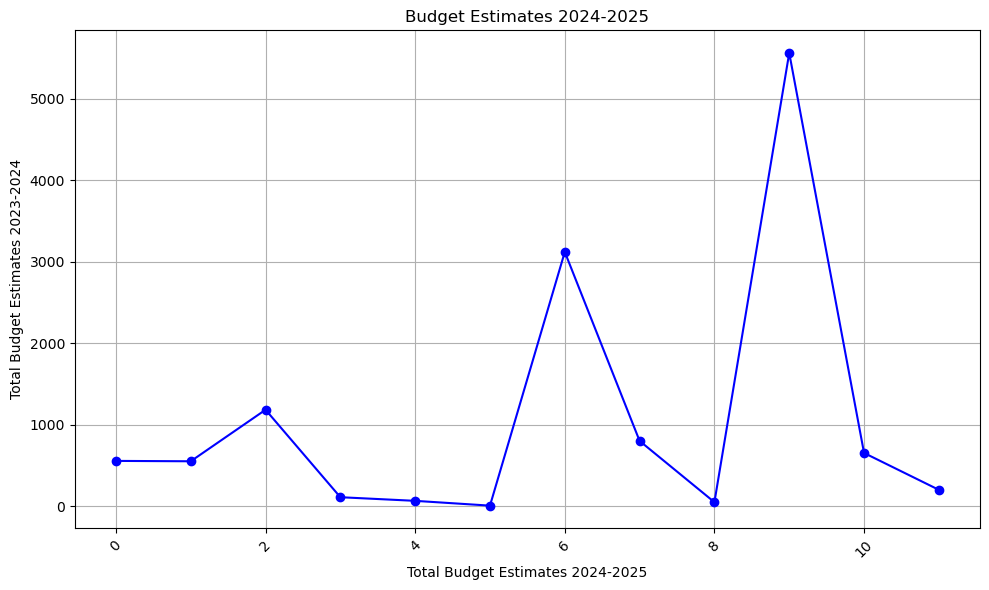

In [15]:
# Plotting the time series
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Total Budget Estimates 2024-2025'], marker='o', color='b', linestyle='-')

# Adding title and labels
plt.title('Budget Estimates 2024-2025')
plt.xlabel('Total Budget Estimates 2024-2025')
plt.ylabel('Total Budget Estimates 2023-2024')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
import plotly.express as px

# Create violin plot
fig = px.violin(df, y='Total Budget Estimates 2024-2025', box=True, points='all', title='Total Budget Estimates 2024-2025')

# Show plot
fig.show()

In [17]:
import plotly.graph_objects as go

# Assuming 'Month' is set as the index of your DataFrame
# If 'Month' is not the index, you should use df.index instead of df['Month']

# Create figure
fig = go.Figure()

# Add trace
fig.add_trace(go.Scatter(x=df.index, y=df['Total Budget Estimates 2024-2025'], mode='lines', fill='tozeroy', name='Sales'))

# Update layout
fig.update_layout(title='Budget Forecast',
                  xaxis_title='Total Budget Estimates 2024-2025',
                  yaxis_title='Total Budget Estimates 2023-2024')

# Show plot
fig.show()

In [18]:
df

Expenditure Type  \
0   Ministry of Civil Aviation - Central Sector Sc...   
1   Ministry of Civil Aviation - Establishment Exp...   
2   Ministry of Civil Aviation - Other Central Sec...   
3   Ministry of Coal - Central Sector Schemes/Proj...   
4   Ministry of Coal - Establishment Expenditure o...   
5   Ministry of Coal - Other Central Sector Expend...   
6   Department of Commerce - Central Sector Scheme...   
7   Department of Commerce - Establishment Expendi...   
8   Department of Commerce - Other Central Sector ...   
9   Promotion of Industry and Internal Trade - Cen...   
10  Promotion of Industry and Internal Trade - Est...   
11  Promotion of Industry and Internal Trade - Oth...   

    2022-2023 Actuals (Revenue)  2022-2023 Actuals (Capital)  \
0                       8333.12                         0.00   
1                        464.98                        86.44   
2                        436.31                         0.00   
3                         55.58                         0.00   
4                         47.31                         0.00   
5                          0.57                         0.00   
6                       5914.87                       388.00   
7                        734.39                         7.00   
8                          9.67                         0.00   
9                       3690.38                      1565.00   
10                       498.43                        33.28   
11                       159.78                         0.00   

    Total 2022-2023 Actuals  Budget Estimates 2023-2024 (Revenue)  \
0                   8333.12                               1277.09   
1                    551.42                                555.10   
2                    436.31                               1194.51   
3                     55.58                                113.50   
4                     47.31                                 66.63   
5                      0.57                                 10.64   
6                   6302.87                               4351.46   
7                    741.39                                801.47   
8                      9.67                                 63.50   
9                   5255.38                               5741.88   
10                   531.71                                626.80   
11                   159.78                                180.25   

    Budget Estimates 2023-2024 (Capital)  Total Budget Estimates 2023-2024  \
0                                   0.00                           1277.09   
1                                  86.66                            641.76   
2                                   0.00                           1194.51   
3                                   0.00                            113.50   
4                                   1.55                             68.18   
5                                   0.00                             10.64   
6                                   0.01                           4351.47   
7                                  38.14                            839.61   
8                                   0.00                             63.50   
9                                1630.15                           7372.03   
10                                 21.55                            648.35   
11                                  0.00                            180.25   

    Revised Estimates 2023-2024 (Revenue)  \
0                                  883.01   
1                                  469.53   
2                                  797.81   
3                                  110.50   
4                                   66.33   
5                                   10.66   
6                                 5244.39   
7                                  739.35   
8                                   37.57   
9                                 3966.55   
10                                 595.39   
11       

# Decide Dependant and Independant Elements in Data Set

In [56]:
# Separating independent and dependent variables
X = df.iloc[:, 1:].values # Select all rows and all columns starting from the second column
y = df.iloc[:, -1].values   # Select all rows and only the last column

In [57]:
# Convert columns to float
columns_to_convert = df.columns[1:]  # Exclude the 'Expenditure Type' column
for column in columns_to_convert:
    df[column] = df[column].astype(float)


In [58]:
print(df)

                                     Expenditure Type  \
0   Ministry of Civil Aviation - Central Sector Sc...   
1   Ministry of Civil Aviation - Establishment Exp...   
2   Ministry of Civil Aviation - Other Central Sec...   
3   Ministry of Coal - Central Sector Schemes/Proj...   
4   Ministry of Coal - Establishment Expenditure o...   
5   Ministry of Coal - Other Central Sector Expend...   
6   Department of Commerce - Central Sector Scheme...   
7   Department of Commerce - Establishment Expendi...   
8   Department of Commerce - Other Central Sector ...   
9   Promotion of Industry and Internal Trade - Cen...   
10  Promotion of Industry and Internal Trade - Est...   
11  Promotion of Industry and Internal Trade - Oth...   

    2022-2023 Actuals (Revenue)  2022-2023 Actuals (Capital)  \
0                       8333.12                         0.00   
1                        464.98                        86.44   
2                        436.31                         0.00   
3 

In [59]:
df.dtypes

Expenditure Type                          object
2022-2023 Actuals (Revenue)              float64
2022-2023 Actuals (Capital)              float64
Total 2022-2023 Actuals                  float64
Budget Estimates 2023-2024 (Revenue)     float64
Budget Estimates 2023-2024 (Capital)     float64
Total Budget Estimates 2023-2024         float64
Revised Estimates 2023-2024 (Revenue)    float64
Revised Estimates 2023-2024 (Capital)    float64
Total Revised Estimates 2023-2024        float64
Budget Estimates 2024-2025 (Revenue)     float64
Budget Estimates 2024-2025 (Capital)     float64
Total Budget Estimates 2024-2025         float64
dtype: object

In [60]:
df.columns

Index(['Expenditure Type', '2022-2023 Actuals (Revenue)',
       '2022-2023 Actuals (Capital)', 'Total 2022-2023 Actuals',
       'Budget Estimates 2023-2024 (Revenue)',
       'Budget Estimates 2023-2024 (Capital)',
       'Total Budget Estimates 2023-2024',
       'Revised Estimates 2023-2024 (Revenue)',
       'Revised Estimates 2023-2024 (Capital)',
       'Total Revised Estimates 2023-2024',
       'Budget Estimates 2024-2025 (Revenue)',
       'Budget Estimates 2024-2025 (Capital)',
       'Total Budget Estimates 2024-2025'],
      dtype='object')

In [61]:
x=df.drop('Total Budget Estimates 2024-2025',axis=1)

In [62]:
x

Expenditure Type  \
0   Ministry of Civil Aviation - Central Sector Sc...   
1   Ministry of Civil Aviation - Establishment Exp...   
2   Ministry of Civil Aviation - Other Central Sec...   
3   Ministry of Coal - Central Sector Schemes/Proj...   
4   Ministry of Coal - Establishment Expenditure o...   
5   Ministry of Coal - Other Central Sector Expend...   
6   Department of Commerce - Central Sector Scheme...   
7   Department of Commerce - Establishment Expendi...   
8   Department of Commerce - Other Central Sector ...   
9   Promotion of Industry and Internal Trade - Cen...   
10  Promotion of Industry and Internal Trade - Est...   
11  Promotion of Industry and Internal Trade - Oth...   

    2022-2023 Actuals (Revenue)  2022-2023 Actuals (Capital)  \
0                       8333.12                         0.00   
1                        464.98                        86.44   
2                        436.31                         0.00   
3                         55.58                         0.00   
4                         47.31                         0.00   
5                          0.57                         0.00   
6                       5914.87                       388.00   
7                        734.39                         7.00   
8                          9.67                         0.00   
9                       3690.38                      1565.00   
10                       498.43                        33.28   
11                       159.78                         0.00   

    Total 2022-2023 Actuals  Budget Estimates 2023-2024 (Revenue)  \
0                   8333.12                               1277.09   
1                    551.42                                555.10   
2                    436.31                               1194.51   
3                     55.58                                113.50   
4                     47.31                                 66.63   
5                      0.57                                 10.64   
6                   6302.87                               4351.46   
7                    741.39                                801.47   
8                      9.67                                 63.50   
9                   5255.38                               5741.88   
10                   531.71                                626.80   
11                   159.78                                180.25   

    Budget Estimates 2023-2024 (Capital)  Total Budget Estimates 2023-2024  \
0                                   0.00                           1277.09   
1                                  86.66                            641.76   
2                                   0.00                           1194.51   
3                                   0.00                            113.50   
4                                   1.55                             68.18   
5                                   0.00                             10.64   
6                                   0.01                           4351.47   
7                                  38.14                            839.61   
8                                   0.00                             63.50   
9                                1630.15                           7372.03   
10                                 21.55                            648.35   
11                                  0.00                            180.25   

    Revised Estimates 2023-2024 (Revenue)  \
0                                  883.01   
1                                  469.53   
2                                  797.81   
3                                  110.50   
4                                   66.33   
5                                   10.66   
6                                 5244.39   
7                                  739.35   
8                                   37.57   
9                                 3966.55   
10                                 595.39   
11       

In [63]:
y=df['Total Budget Estimates 2024-2025']

In [64]:
y

0      559.01
1      554.47
2     1186.52
3      113.50
4       68.94
5       10.11
6     3122.84
7      804.14
8       52.57
9     5564.42
10     656.50
11     204.16
Name: Total Budget Estimates 2024-2025, dtype: float64

# Train Test Split

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.3)

In [67]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 2 to 1
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Expenditure Type                       8 non-null      object 
 1   2022-2023 Actuals (Revenue)            8 non-null      float64
 2   2022-2023 Actuals (Capital)            8 non-null      float64
 3   Total 2022-2023 Actuals                8 non-null      float64
 4   Budget Estimates 2023-2024 (Revenue)   8 non-null      float64
 5   Budget Estimates 2023-2024 (Capital)   8 non-null      float64
 6   Total Budget Estimates 2023-2024       8 non-null      float64
 7   Revised Estimates 2023-2024 (Revenue)  8 non-null      float64
 8   Revised Estimates 2023-2024 (Capital)  8 non-null      float64
 9   Total Revised Estimates 2023-2024      8 non-null      float64
 10  Budget Estimates 2024-2025 (Revenue)   8 non-null      float64
 11  Budget Est

In [68]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 6 to 11
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Expenditure Type                       4 non-null      object 
 1   2022-2023 Actuals (Revenue)            4 non-null      float64
 2   2022-2023 Actuals (Capital)            4 non-null      float64
 3   Total 2022-2023 Actuals                4 non-null      float64
 4   Budget Estimates 2023-2024 (Revenue)   4 non-null      float64
 5   Budget Estimates 2023-2024 (Capital)   4 non-null      float64
 6   Total Budget Estimates 2023-2024       4 non-null      float64
 7   Revised Estimates 2023-2024 (Revenue)  4 non-null      float64
 8   Revised Estimates 2023-2024 (Capital)  4 non-null      float64
 9   Total Revised Estimates 2023-2024      4 non-null      float64
 10  Budget Estimates 2024-2025 (Revenue)   4 non-null      float64
 11  Budget Es

In [69]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [70]:
lm.fit(X_train, y_train )  # Training

ValueError: could not convert string to float: 'Ministry of Civil Aviation - Other Central Sector Expenditure'

In [ ]:
from sklearn.metrics import mean_squared_error
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Future Predictions

In [186]:
import numpy as np
import plotly.graph_objects as go

# Generate x values for prediction
x = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)

# Predict y values using the model
y = model.predict(x)

# Create a Plotly figure
fig = go.Figure([
    # Scatter plot of training data
    go.Scatter(x=X_train.squeeze(), y=y_train, name='Train', mode='markers'),
    # Scatter plot of testing data
    go.Scatter(x=X_test.squeeze(), y=y_test, name='Test', mode='markers'),
    # Line plot of predicted values
    go.Scatter(x=x.squeeze(), y=y, name='Prediction')
])

# Display the figure
fig.show()


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



ValueError: X has 1 features, but LinearRegression is expecting 11 features as input.